In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import seaborn as sns
from matplotlib import rcParams

In [118]:
# Import the data sets
adv = pd.read_excel('https://github.com/danielabboudi/DB_Project/raw/main/NBA_Advanced.xlsx')
trad = pd.read_excel('https://github.com/danielabboudi/DB_Project/raw/main/NBA_Traditional_per100.xlsx')
opp = pd.read_excel('https://github.com/danielabboudi/DB_Project/raw/main/NBA_Opponent_per100.xlsx')

In [119]:
# Merge the data sets
merge1 = pd.merge(trad,adv,how='left',left_on=['Season','TEAM'],right_on=['Season','TEAM'])
df = pd.merge(merge1,opp,how='left',left_on=['Season','TEAM'],right_on=['Season','TEAM'])

In [120]:
# Convert percentages into decimals
df['FG%'] = df['FG%']/100
df['3P%'] = df['3P%']/100
df['FT%'] = df['FT%']/100
df['OREB%'] = df['OREB%']/100
df['DREB%'] = df['DREB%']/100
df['TOV%'] = df['TOV%']/100
df['TS%'] = df['TS%']/100

df['OPPFG%'] = df['OPPFG%']/100
df['OPP3P%'] = df['OPP3P%']/100
df['OPPFT%'] = df['OPPFT%']/100

In [121]:
# Calculate new columns for additional metrics
df['2P%'] = round((df['FGM']-df['3PM'])/(df['FGA']-df['3PA']),4)                 # Expanding shooting
df['FTR'] = round(df['FTA']/df['FGA'],4)
df['3PFREQ'] = round(df['3PA']/df['FGA'],4)                                      # Expanding shooting
df['FGAFREQ'] = round(df['FGA']/(df['FGA']+df['TOV']+0.44*df['FTA']),4)          # Expanding shooting
df['STL%'] = round(df['STL']/df['OPPTOV'],4)                                     # Expanding turnovers

df['OPPTS%'] = round(df['OPPPTS']/(2*(df['OPPFGA']+0.44*df['OPPFTA'])),4)
df['OPP2P%'] = round((df['OPPFGM']-df['OPP3PM'])/(df['OPPFGA']-df['OPP3PA']),4)
df['OPPFTR'] = round(df['OPPFTA']/df['OPPFGA'],4)
df['OPP3PFREQ'] = round(df['OPP3PA']/df['OPPFGA'],4)
df['OPPFGAFREQ'] = round(df['OPPFGA']/(df['OPPFGA']+df['OPPTOV']+0.44*df['OPPFTA']),4)
df['OPPFTAFREQ'] = round((0.44*df['OPPFTA'])/(df['OPPFGA']+df['OPPTOV']+0.44*df['OPPFTA']),4)
df['OPPTOV%'] = round(df['OPPTOV']/(df['OPPFGA']+df['OPPTOV']+0.44*df['OPPFTA']),4)
df['OPPSTL%'] = round(df['OPPSTL']/df['TOV'],4)
df['OPPOREB%'] = 1-df['DREB%']
df['OPPDREB%'] = 1-df['OREB%']
df['OPPAST/TO'] = df['OPPAST']/df['OPPTOV']

In [122]:
# Select the columns we want based on the four factors
general = ['Season','TEAM','WIN%','OFFRTG','DEFRTG','NETRTG','PACE']
shooting = ['TS%','2P%','3P%','FGAFREQ','3PFREQ',]
turnovers = ['TOV%','AST/TO','STL%']
rebounding = ['OREB%','DREB%']
free_throws = ['FT%','FTR']

opp_shooting = ['OPPTS%','OPP2P%','OPP3P%','OPPFGAFREQ','OPP3PFREQ',]
opp_turnovers = ['OPPTOV%','OPPAST/TO','OPPSTL%']
opp_rebounding = ['OPPOREB%','OPPDREB%']
opp_free_throws = ['OPPFT%','OPPFTR']

df = df[general+shooting+turnovers+rebounding+free_throws+opp_shooting+opp_turnovers+opp_rebounding+opp_free_throws]

In [123]:
# Create a dictionary of NBA Champions
champions = {2001: 'Los Angeles Lakers',
             2002: 'Los Angeles Lakers',
             2003: 'San Antonio Spurs',
             2004: 'Detroit Pistons',
             2005: 'San Antonio Spurs',
             2006: 'Miami Heat',
             2007: 'San Antonio Spurs',
             2008: 'Boston Celtics',
             2009: 'Los Angeles Lakers',
             2010: 'Los Angeles Lakers',
             2011: 'Dallas Mavericks',
             2012: 'Miami Heat',
             2013: 'Miami Heat',
             2014: 'San Antonio Spurs',
             2015: 'Golden State Warriors',
             2016: 'Cleveland Cavaliers',
             2017: 'Golden State Warriors',
             2018: 'Golden State Warriors',
             2019: 'Toronto Raptors',
             2020: 'Los Angeles Lakers'}

In [124]:
# Pull Champions from our Dictionary
df['Champion'] = 0
for i in range(0,len(df),1):
    if df['Season'][i] == 2021:
        df['Champion'][i] = 0 
    elif df['TEAM'][i] == champions[df['Season'][i]]:
        df['Champion'][i] = 1
    else:
        df['Champion'][i] = 0

<ipython-input-124-8739d2c66c8f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Champion'][i] = 0
<ipython-input-124-8739d2c66c8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Champion'][i] = 1
<ipython-input-124-8739d2c66c8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Champion'][i] = 0


In [125]:
df[df['Champion']==1][['Season','TEAM']]

,Season,TEAM
1,2001,Los Angeles Lakers
30,2002,Los Angeles Lakers
59,2003,San Antonio Spurs
92,2004,Detroit Pistons
118,2005,San Antonio Spurs
150,2006,Miami Heat
178,2007,San Antonio Spurs
206,2008,Boston Celtics
237,2009,Los Angeles Lakers
268,2010,Los Angeles Lakers


In [126]:
df3 = df.rename(columns={'WIN%': 'WINPCT', 'TS%':'TSPCT', '2P%':'2PPCT', '3P%':'3PPCT', 'OPPTOV%':'OPPTOVPCT', 'OPPOREB%':'OPPOREBPCT', 'OPPDREB%':'OPPDREBPCT', 'OPPFT%':'OPPFTPCT', 'TOV%':'TOVPCT', 'OREB%':'OREBPCT', 'DREB%':'DREBPCT'})

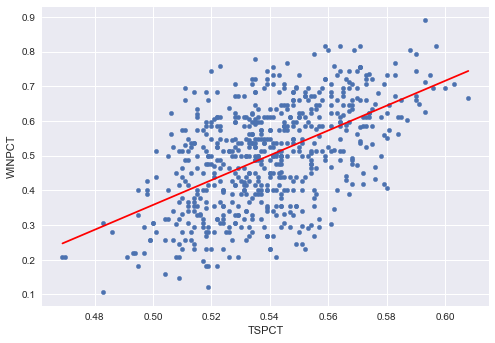

In [128]:
reg1 = smf.ols('WINPCT ~ TSPCT', df3).fit()
df3['yhat1'] = reg1.predict()
fig,ax = plt.subplots()
df3.plot.scatter(x='TSPCT', y='WINPCT', ax=ax)
df3.sort_values('TSPCT').set_index('TSPCT')['yhat1'].plot(ax=ax, color='r')
rcParams['figure.figsize'] = 8,6
plt.style.use('seaborn')

In [129]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 WINPCT   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     256.2
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.45e-48
Time:                        11:49:54   Log-Likelihood:                 408.26
No. Observations:                 626   AIC:                            -812.5
Df Residuals:                     624   BIC:                            -803.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4315      0.121    -11.854      0.0

We began testing these particular drivers of NBA success, beginning first with True Shooting Percentage, which is an efficiency measure accounting for both the accuracy and point value of each shot. As we would expect, Win Percentage was highly correlated (positively) with True Shooting as evidenced by the P-value & R-squared.

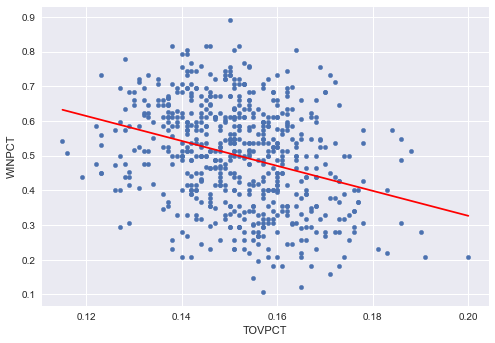

In [132]:
reg2 = smf.ols('WINPCT ~ TOVPCT', df3).fit()
df3['yhat2'] = reg2.predict()
fig,ax = plt.subplots()
df3.plot.scatter(x='TOVPCT', y='WINPCT', ax=ax)
df3.sort_values('TOVPCT').set_index('TOVPCT')['yhat2'].plot(ax=ax, color='r')
rcParams['figure.figsize'] = 8,6
plt.style.use('seaborn')

In [133]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 WINPCT   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     66.02
Date:                Tue, 11 May 2021   Prob (F-statistic):           2.40e-15
Time:                        11:50:10   Log-Likelihood:                 332.08
No. Observations:                 626   AIC:                            -660.2
Df Residuals:                     624   BIC:                            -651.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0461      0.067     15.503      0.0

We next tested Turnover Percentage, which as we would expected, is negatively correlated with Win Percentage -- teams that turn the ball over frequently are both depriving themselves of scoring chances but also providing additional opportunities (typically more efficient scoring opportunities) for their opponents. 

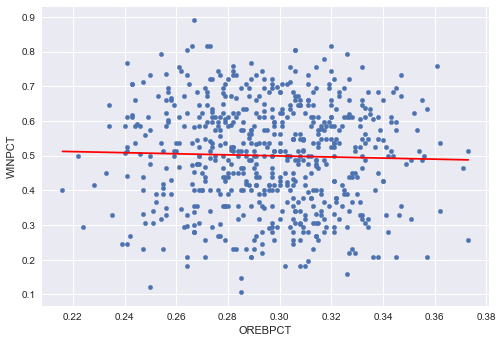

In [135]:
reg3 = smf.ols('WINPCT ~ OREBPCT', df3).fit()
df3['yhat3'] = reg3.predict()
fig,ax = plt.subplots()
df3.plot.scatter(x='OREBPCT', y='WINPCT', ax=ax)
df3.sort_values('OREBPCT').set_index('OREBPCT')['yhat3'].plot(ax=ax, color='r')
rcParams['figure.figsize'] = 8,6
plt.style.use('seaborn')

In [136]:
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                 WINPCT   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5433
Date:                Tue, 11 May 2021   Prob (F-statistic):              0.461
Time:                        11:50:18   Log-Likelihood:                 300.87
No. Observations:                 626   AIC:                            -597.7
Df Residuals:                     624   BIC:                            -588.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5458      0.063      8.697      0.0

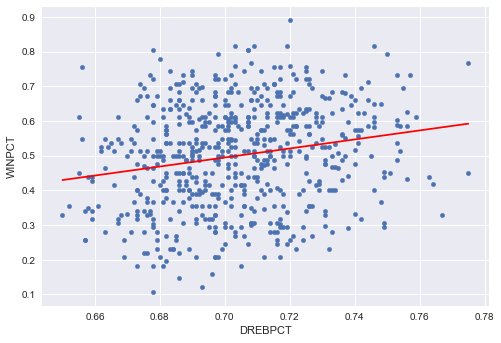

In [138]:
reg4 = smf.ols('WINPCT ~ DREBPCT', df3).fit()
df3['yhat4'] = reg4.predict()
fig,ax = plt.subplots()
df3.plot.scatter(x='DREBPCT', y='WINPCT', ax=ax)
df3.sort_values('DREBPCT').set_index('DREBPCT')['yhat4'].plot(ax=ax, color='r')
rcParams['figure.figsize'] = 8,6
plt.style.use('seaborn')

In [139]:
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                 WINPCT   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     26.37
Date:                Tue, 11 May 2021   Prob (F-statistic):           3.78e-07
Time:                        11:50:28   Log-Likelihood:                 313.55
No. Observations:                 626   AIC:                            -623.1
Df Residuals:                     624   BIC:                            -614.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4159      0.178     -2.331      0.0

We found that Offensive Rebound Rates did not have a significant impact on Win Percentage, however Defensive Rebounding did (positive correlation). It makes sense intuitively at least that poor defensive rebounding teams are providing additional opporunities for opponents (i.e. more possessions = more shots, more scoring chances, more free throw opportunities). Offensive rebounding may not be as important as the most efficient scoring teams likely have fewer opportunities for them.

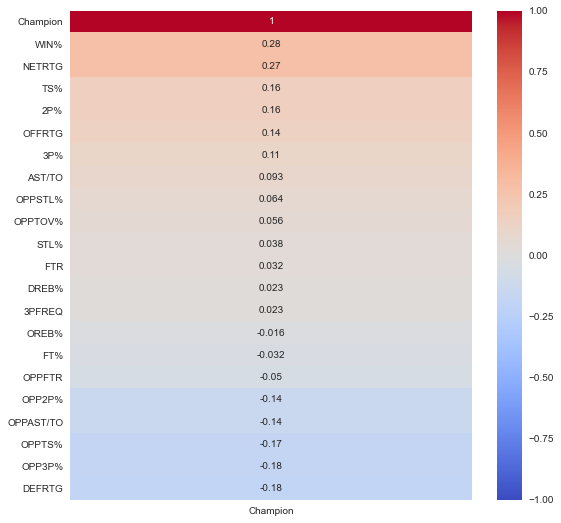

In [140]:
df_heat = df.drop(columns=['PACE', 'OPPDREB%', 'OPPFGAFREQ', 'TOV%', 'Season', 'OPPOREB%', 'FGAFREQ', 'OPP3PFREQ', 'OPPFT%',])
corr = df_heat.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr[['Champion']].sort_values(by=['Champion'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

We haven't set out to determine what drives winning percentage in the NBA but rather "What Makes an NBA Champion?" As such, we have first started with the above correlation heat map to show what metrics (positive & negative) correlate best with NBA Champions over the past 20 years.

In [141]:
#Create dataframe of NBA Champions, removing Team Name, Champion classification & OPPFTR
df_champion = df.set_index('Season')
champion_1 = df_champion[(df_champion["Champion"]==1)]
champion_1 = champion_1.drop(columns=['TEAM', 'Champion', 'OPPFTR'])
champion_1

,WIN%,OFFRTG,DEFRTG,NETRTG,PACE,TS%,2P%,3P%,FGAFREQ,3PFREQ,...,OPP2P%,OPP3P%,OPPFGAFREQ,OPP3PFREQ,OPPTOV%,OPPAST/TO,OPPSTL%,OPPOREB%,OPPDREB%,OPPFT%
Season,,,,,,,,,,,,,,,,,,,,,
2001,0.683,107.0,103.6,3.5,92.90,0.535,0.4929,0.344,0.7511,0.1903,...,0.4543,0.354,0.7730,0.1708,0.1216,1.546763,0.5195,0.309,0.662,0.754
2002,0.707,108.0,100.4,7.6,93.32,0.534,0.4900,0.354,0.7755,0.2103,...,0.4477,0.317,0.7672,0.1862,0.1298,1.436242,0.5630,0.314,0.689,0.761
2003,0.732,103.9,98.1,5.8,91.46,0.541,0.4902,0.354,0.7361,0.2017,...,0.4433,0.339,0.7705,0.1556,0.1416,1.263804,0.5146,0.313,0.689,0.768
2004,0.659,100.3,93.9,6.5,89.34,0.511,0.4518,0.344,0.7458,0.1529,...,0.4391,0.302,0.7547,0.1848,0.1551,1.191011,0.5238,0.314,0.668,0.744
2005,0.720,106.1,97.8,8.3,89.96,0.534,0.4779,0.363,0.7585,0.2166,...,0.4369,0.367,0.7515,0.1380,0.1468,1.113772,0.5298,0.303,0.679,0.768
2006,0.634,107.5,103.4,4.1,92.56,0.556,0.5178,0.345,0.7424,0.2266,...,0.4610,0.361,0.7621,0.2077,0.1236,1.503597,0.4679,0.274,0.703,0.739
2007,0.707,108.6,99.4,9.2,90.22,0.561,0.5039,0.381,0.7591,0.2468,...,0.4646,0.334,0.7685,0.1703,0.1397,1.202532,0.5098,0.285,0.721,0.740
2008,0.805,108.8,98.1,10.8,91.88,0.569,0.5048,0.381,0.7409,0.2482,...,0.4527,0.316,0.7372,0.2425,0.1524,1.173410,0.4756,0.293,0.694,0.743
2009,0.793,111.4,103.5,7.9,95.49,0.555,0.5058,0.361,0.7756,0.2176,...,0.4808,0.345,0.7627,0.2491,0.1425,1.450617,0.5786,0.302,0.674,0.753


In [142]:
from sklearn.linear_model import LinearRegression as linreg

In [143]:
sklearn_reg = linreg().fit(X=champion_1[['TS%']], y=champion_1['NETRTG'])

In [144]:
sklearn_reg.score(X=champion_1[['TS%']], y=champion_1['NETRTG'])

0.11077191233019112

In [145]:
champion_1['yhat_sklearn_reg'] = sklearn_reg.predict(champion_1[['TS%']])

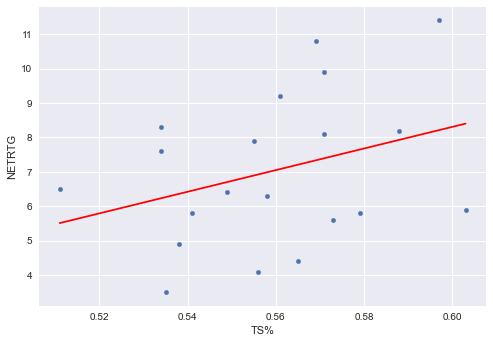

In [147]:
champion_1.plot.scatter(x='TS%', y='NETRTG', cmap='Spectral')
champion_1.sort_values('TS%').set_index('TS%')['yhat_sklearn_reg'].plot(color='r')
rcParams['figure.figsize'] = 8,6
plt.style.use('seaborn')

In [148]:
from sklearn.neighbors import KNeighborsRegressor as knn

In [149]:
sklearn_reg2 = linreg().fit(X=df_champion[['NETRTG']], y=df_champion['Champion'])

In [150]:
sklearn_reg2.score(X=df_champion[['NETRTG']], y=df_champion['Champion'])

0.07511309411926892

0.14037597359735976


(-2.0, 12.0)

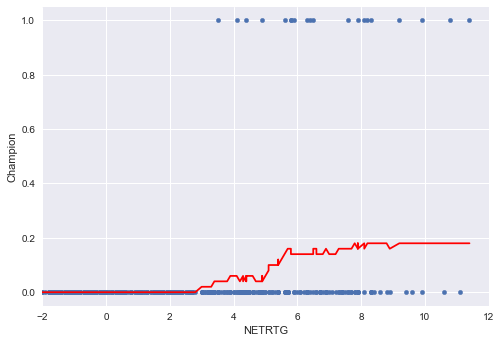

In [152]:
sklearn_knn2 = knn(n_neighbors=50).fit(df_champion[['NETRTG', 'TS%']], df_champion['Champion'])
print(sklearn_knn2.score(df_champion[['NETRTG', 'TS%']], df_champion['Champion']))

df_champion['yhat_knn2'] = sklearn_knn2.predict(df_champion[['NETRTG', 'TS%']])
df_champion.plot.scatter(x='NETRTG', y='Champion')
df_champion.sort_values('NETRTG').set_index('NETRTG')['yhat_knn2'].plot(color='r')
rcParams['figure.figsize'] = 8,6
plt.style.use('seaborn')
plt.xlim(-2,12)

No champion in our data set has had a Net Rating less than 3.5. Of the current 2021 NBA teams, only 7 have a Net Rating of at least 3.5 but we are including the defending champion Lakers who have a current Net Rating of 3.4 (as of date of data pull). Steep drop-off to NY Knicks who are 9th with a Net Rating of 2.3.

In [154]:
#create dataframe of 2021 NBA Teams with Net Rating above 3.3
current_yr_teams = df[(df["Season"]==2021)]
current_yr_teams = current_yr_teams[current_yr_teams['NETRTG']>3.3]
current_yr_teams

,Season,TEAM,WIN%,OFFRTG,DEFRTG,NETRTG,PACE,TS%,2P%,3P%,...,OPPFGAFREQ,OPP3PFREQ,OPPTOV%,OPPAST/TO,OPPSTL%,OPPOREB%,OPPDREB%,OPPFT%,OPPFTR,Champion
596,2021,Utah Jazz,0.733,116.2,107.3,8.9,99.56,0.595,0.5378,0.390,...,0.8205,0.3493,0.1030,1.913043,0.5319,0.247,0.718,0.764,0.2118,0
597,2021,Phoenix Suns,0.712,115.0,108.8,6.2,98.12,0.593,0.5613,0.374,...,0.7891,0.3817,0.1244,1.630435,0.5344,0.256,0.753,0.772,0.2491,0
598,2021,LA Clippers,0.694,117.3,110.5,6.7,97.85,0.600,0.5260,0.419,...,0.7954,0.3746,0.1192,1.765152,0.5530,0.245,0.729,0.780,0.2440,0
599,2021,Brooklyn Nets,0.667,117.0,113.0,4.0,100.39,0.608,0.5661,0.388,...,0.8008,0.3951,0.1135,1.897638,0.5620,0.268,0.742,0.773,0.2433,0
600,2021,Denver Nuggets,0.650,116.7,111.8,4.9,97.49,0.591,0.5530,0.383,...,0.7853,0.4147,0.1276,1.886525,0.5547,0.252,0.706,0.777,0.2523,0
601,2021,Philadelphia 76ers,0.650,111.5,107.5,3.9,100.63,0.576,0.5313,0.369,...,0.7720,0.3800,0.1386,1.506494,0.5068,0.254,0.722,0.758,0.2634,0
602,2021,Milwaukee Bucks,0.627,116.4,109.8,6.6,102.43,0.593,0.5473,0.395,...,0.8138,0.4180,0.1155,1.906250,0.5109,0.244,0.726,0.790,0.1973,0
603,2021,Los Angeles Lakers,0.583,109.7,106.3,3.4,98.95,0.571,0.5394,0.354,...,0.7826,0.3751,0.1378,1.614379,0.5455,0.254,0.733,0.771,0.2313,0


If we compare the current 2021 NBA Teams on just Net Rating & True Shooting Percentage, using the k nearest neighbros method, we see the following prediction results:

| Team | Prediction Result |
| :- | -: |
| ***Utah Jazz*** | 0.16 |
| ***LA Clippers*** | 0.14 |
| ***Phoenix Suns*** | 0.14 |
| ***Milwaukee Bucks*** | 0.14 |
| ***Denver Nuggets*** | 0.06 |
| ***Brooklyn Nets*** | 0.06 |
| ***Philadelphia 76ers*** | 0.06 |
| ***LA Lakers*** | 0.04 |

In [155]:
sklearn_knn2.predict([[8.9,.595]])
#utah jazz example for above

array([0.16])

In [156]:
current_yr_teams_cap = current_yr_teams.drop(columns=['WIN%', 'OFFRTG', 'DEFRTG', 'PACE', '2P%', '3P%',
       'FGAFREQ', 'STL%', 'OREB%', 'FT%', 'AST/TO',
       'FTR', 'OPP2P%', 'OPPFGAFREQ', 'OPP3PFREQ', 'OPPOREB%',
    'OPPAST/TO', 'OPPSTL%', 'OPPDREB%', 'OPPFT%', 'OPPFTR', 'Champion'])
current_yr_teams_cap

,Season,TEAM,NETRTG,TS%,3PFREQ,TOV%,DREB%,OPPTS%,OPP3P%,OPPTOV%
596,2021,Utah Jazz,8.9,0.595,0.4898,0.141,0.753,0.5348,0.340,0.1030
597,2021,Phoenix Suns,6.2,0.593,0.3948,0.131,0.744,0.5634,0.352,0.1244
598,2021,LA Clippers,6.7,0.600,0.3948,0.132,0.755,0.5663,0.360,0.1192
599,2021,Brooklyn Nets,4.0,0.608,0.4132,0.137,0.732,0.5686,0.367,0.1135
600,2021,Denver Nuggets,4.9,0.591,0.3825,0.137,0.748,0.5771,0.358,0.1276
601,2021,Philadelphia 76ers,3.9,0.576,0.3447,0.146,0.746,0.5598,0.364,0.1386
602,2021,Milwaukee Bucks,6.6,0.593,0.4081,0.137,0.756,0.5605,0.374,0.1155
603,2021,Los Angeles Lakers,3.4,0.571,0.3663,0.154,0.746,0.5562,0.351,0.1378


In [157]:
sklearn_reg_multi = linreg().fit(X=df_champion[['NETRTG', 'TS%', '3PFREQ', 'TOV%', 'OPP3P%', 'OPPTOV%']], y=df_champion['Champion'])

In [158]:
sklearn_reg_multi.score(X=df_champion[['NETRTG', 'TS%', '3PFREQ', 'TOV%', 'OPP3P%', 'OPPTOV%']], y=df_champion['Champion'])

0.08617038554617296

0.12237072607260735


(-2.0, 12.0)

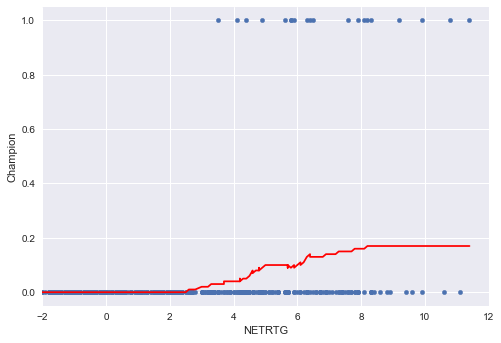

In [160]:
sklearn_knn_multi = knn(n_neighbors=100).fit(df_champion[['NETRTG', 'TS%', '3PFREQ', 'TOV%', 'OPP3P%', 'OPPTOV%']], df_champion['Champion'])
print(sklearn_knn_multi.score(df_champion[['NETRTG', 'TS%', '3PFREQ', 'TOV%', 'OPP3P%', 'OPPTOV%']], df_champion[['Champion']]))

df_champion['yhat_knn_multi'] = sklearn_knn_multi.predict(df_champion[['NETRTG', 'TS%', '3PFREQ', 'TOV%', 'OPP3P%', 'OPPTOV%']])
df_champion.plot.scatter(x='NETRTG', y='Champion')
df_champion.sort_values('NETRTG').set_index('NETRTG')['yhat_knn_multi'].plot(color='r')
rcParams['figure.figsize'] = 8,6
plt.style.use('seaborn')
plt.xlim(-2,12)

If we compare the current 2021 NBA Teams on this expanded set of parameters (not just Net Rating & True Shooting), we see the prediction results change with the Jazz & Nuggets as the main beneficiaries:


| Team | Prediction Result |
| :- | -: |
| ***Utah Jazz*** | 0.17 |
| ***LA Clippers*** | 0.13 |
| ***Milwaukee Bucks*** | 0.13 |
| ***Phoenix Suns*** | 0.11 |
| ***Denver Nuggets*** | 0.09 |
| ***Brooklyn Nets*** | 0.04 |
| ***Philadelphia 76ers*** | 0.04 |
| ***LA Lakers*** | 0.03 |

In [161]:
sklearn_knn_multi.predict([[8.9,.595, .4898, .141, .340, .1030]])
#utahjazz for example above

array([0.17])

One of the issues we have though, is that Net Rating is a comprehensive statistical measure and often dominates the data. It becomes clear that our model is far less predictive and and subject to much more noise when we remove the Net Rating component as seen below:

In [162]:
sklearn_reg_multi2 = linreg().fit(X=df_champion[['TS%', 'OPPTS%', 'TOV%', 'OPPTOV%','DREB%']], y=df_champion['Champion'])
df_champion['yhat_sklearn_multi2'] = sklearn_reg_multi2.predict(df_champion[['TS%', 'OPPTS%', 'TOV%', 'OPPTOV%', 'DREB%']])
sklearn_reg_multi2.score(X=df_champion[['TS%', 'OPPTS%', 'TOV%', 'OPPTOV%', 'DREB%']], y=df_champion['Champion'])

0.08639833315834344

0.06251966263292996


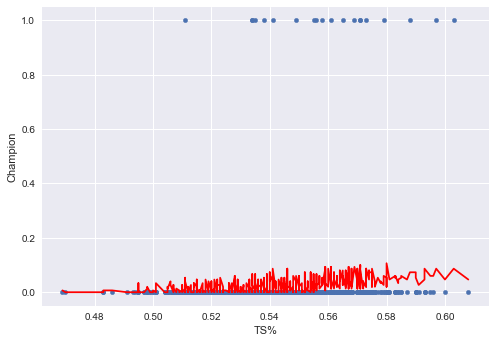

In [164]:
sklearn_knn_multi2 = knn(n_neighbors=150).fit(df_champion[['TS%', 'OPPTS%', 'TOV%', 'OPPTOV%', 'DREB%']], df_champion['Champion'])
print(sklearn_knn_multi2.score(df_champion[['TS%', 'OPPTS%', 'TOV%', 'OPPTOV%', 'DREB%']], df_champion[['Champion']]))

df_champion['yhat_knn_multi2'] = sklearn_knn_multi2.predict(df_champion[['TS%', 'OPPTS%', 'TOV%', 'OPPTOV%', 'DREB%']])
df_champion.plot.scatter(x='TS%', y='Champion')
df_champion.sort_values('TS%').set_index('TS%')['yhat_knn_multi2'].plot(color='r')
rcParams['figure.figsize'] = 8,6
plt.style.use('seaborn')

The prediction results of our model become materially lower when we remove the Net Rating component. 



| Team | Prediction Result |
| :- | -: |
| ***Utah Jazz*** | 0.06 |
| ***Milwaukee Bucks*** | 0.053 |
| ***Phoenix Suns*** | 0.047 |
| ***LA Clippers*** | 0.047 |
| ***Brooklyn Nets*** | 0.047 |
| ***LA Lakers*** | 0.04 |
| ***Philadelphia 76ers*** | 0.04 |
| ***Denver Nuggets*** | 0.027 |

In [165]:
sklearn_knn_multi2.predict([[.595, .5348, .141, .1030, .753]])
#utahjazz for example above

array([0.06])

In [167]:
#Median champion attributes
median_champ = champion_1.drop(columns=['yhat_sklearn_reg'])
median_champ.mean(axis=0)

WIN%            0.728150
OFFRTG        108.830000
DEFRTG        101.810000
NETRTG          7.030000
PACE           94.391500
TS%             0.559400
2P%             0.511280
3P%             0.366700
FGAFREQ         0.765990
3PFREQ          0.262420
TOV%            0.151100
AST/TO          1.642000
STL%            0.532365
OREB%           0.293350
DREB%           0.706950
FT%             0.754200
FTR             0.296245
OPPTS%          0.519670
OPP2P%          0.468880
OPP3P%          0.341550
OPPFGAFREQ      0.768280
OPP3PFREQ       0.239215
OPPTOV%         0.137555
OPPAST/TO       1.399179
OPPSTL%         0.537050
OPPOREB%        0.293050
OPPDREB%        0.706650
OPPFT%          0.754600
dtype: float64